# Customer Segmentation Project

In the dynamic landscape of business, understanding customer behavior is important for personalized marketing strategies and enhanced customer experiences. The Customer Categorization Project aims to develop a robust machine learning model capable of classifying consumers into distinct categories based on their interactions with the business. The primary objective is to facilitate this classification during the initial customer visit, providing valuable insights for targeted engagement.

The project employs a diverse set of classifiers implemented in the scikit-learn library, utilizing techniques ranging from Support Vector Machines and Logistic Regression to ensemble methods like Random Forest and Gradient Boosting. The systematic evaluation of these classifiers aims to identify the most effective model for categorizing customers with optimal precision.

# 1. Data Preperation

In this section, the primary focus was on loading and exploring the dataset to gain a comprehensive understanding of its structure and content. The initial steps involved checking for missing values within the columns, revealing that approximately 25% of the data entries were null. This raised concerns about potential challenges during computation and data processing due to the prevalence of null values.

A thorough examination was conducted to identify and address additional instances of null values throughout the dataset. It became evident that proactive measures were required to handle null values, particularly in the 'CustomerID' field, to ensure the smooth progression of the project.

To mitigate the impact of null values and enhance data completeness, the decision was made to remove entries with null values, resulting in a dataframe with 100% completeness across all variables. Later, duplicate entries were scrutinized and systematically removed, further refining the dataset for subsequent analyses.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
from wordcloud import WordCloud, STOPWORDS
import matplotlib.patches as mpatches
import warnings


warnings.filterwarnings("ignore")

In [2]:
# loading the dataset
df = pd.read_csv("data2.csv")
df.shape

(541909, 8)

In [3]:
# familiarizing the dataset
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01/12/2010 08:26       2.55     17850.0  United Kingdom  
1  01/12/2010 08:26       3.39     17850.0  United Kingdom  
2  01/12/2010 08:26       2.75     17850.0  United Kingdom  
3  01/12/2010 08:26       3.39     17850.0  United Kingdom  
4  01/12/2010 08:26       3.39     17850.0  United Kingdom

In [4]:
# displaying summary information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# checking for null values per column
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [6]:
# caluclating the percentage of missing values per column
percentage_missing = df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100
percentage_missing

CustomerID     24.926694
Description     0.268311
InvoiceNo       0.000000
StockCode       0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
Country         0.000000
dtype: float64

In [7]:
# showing columns which do not contain any Description
df[df.Description.isnull()].head()

InvoiceNo StockCode Description  Quantity       InvoiceDate  UnitPrice  \
622     536414     22139         NaN        56  01/12/2010 11:52        0.0   
1970    536545     21134         NaN         1  01/12/2010 14:32        0.0   
1971    536546     22145         NaN         1  01/12/2010 14:33        0.0   
1972    536547     37509         NaN         1  01/12/2010 14:33        0.0   
1987    536549    85226A         NaN         1  01/12/2010 14:34        0.0   

      CustomerID         Country  
622          NaN  United Kingdom  
1970         NaN  United Kingdom  
1971         NaN  United Kingdom  
1972         NaN  United Kingdom  
1987         NaN  United Kingdom

In [8]:
# showing columns which do not contain any CustomerID
df[df.CustomerID.isnull()].head()

InvoiceNo StockCode                      Description  Quantity  \
622     536414     22139                              NaN        56   
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   

           InvoiceDate  UnitPrice  CustomerID         Country  
622   01/12/2010 11:52       0.00         NaN  United Kingdom  
1443  01/12/2010 14:32       2.51         NaN  United Kingdom  
1444  01/12/2010 14:32       2.51         NaN  United Kingdom  
1445  01/12/2010 14:32       0.85         NaN  United Kingdom  
1446  01/12/2010 14:32       1.66         NaN  United Kingdom

In [9]:
# duplicating the dataset
df_copy = df.copy(deep = True)

In [10]:
# removing CustomerID null rows
df_copy.dropna(axis=0, subset=['CustomerID'], inplace=True)
print('Dataframe shape:', df_copy.shape)

# Create initial DataFrame with column types
tab_info = pd.DataFrame(df_copy.dtypes).T.rename(index={0: "Column Type"})

# Concatenate DataFrames for null values and percentages
tab_info = pd.concat([
    tab_info,
    pd.DataFrame(df_copy.isnull().sum()).T.rename(index={0: "Null Values"}),
    pd.DataFrame(df_copy.isnull().sum() / df_copy.shape[0] * 100).T.rename(index={0: "null values (%)"})
])

display(tab_info)

Dataframe shape: (406829, 8)


InvoiceNo StockCode Description Quantity InvoiceDate  \
Column Type        object    object      object    int64      object   
Null Values             0         0           0        0           0   
null values (%)       0.0       0.0         0.0      0.0         0.0   

                UnitPrice CustomerID Country  
Column Type       float64    float64  object  
Null Values             0          0       0  
null values (%)       0.0        0.0     0.0

In [11]:
# dropping duplicate enteries
print("Duplicate Enteries: {}" .format(df_copy.duplicated().sum()))
df_copy.drop_duplicates(inplace = True)
print("Duplicate Enteries After Dropping: {}" .format(df_copy.duplicated().sum()))

Duplicate Enteries: 5225
Duplicate Enteries After Dropping: 0


In [12]:
df_copy['CustomerID'] = df_copy['CustomerID'].astype(int)

# 2. Exploring the Dataset contents

This dataset comprises eight variables, each representing distinct aspects of the transactions:

1. **InvoiceNo**: An integral, six-digit nominal code uniquely assigned to each transaction. Transactions beginning with the letter 'c' denote cancellations.
2. **StockCode**: A five-digit integral nominal code uniquely assigned to each distinct product.
3. **Description**: Nominal field indicating the name of the product.
4. **Quantity**: Numeric field denoting the quantity of each product per transaction.
5. **InvoiceDate**: Numeric field representing the date and time of each transaction generation.
6. **UnitPrice**: Numeric field indicating the unit price of the product in sterling.
7. **CustomerID**: Nominal, five-digit integral code uniquely assigned to each customer.
8. **Country**: Nominal field specifying the name of the country where each customer resides

## Most Ordered Countries

In this section, the focus shifted towards evaluating the geographic distribution of order origins within the dataset. The primary objective was to gain insights into the geographical locations from which orders were predominantly placed.

To achieve this, a visual representation in the form of a map was employed to provide an intuitive indication of the distribution of orders. The geographical concentration of orders was particularly evident, with a significant majority originating from the United Kingdom (UK).

In [13]:
temp = df_copy[['CustomerID', 'InvoiceNo','Country']].groupby(['CustomerID', 'InvoiceNo','Country']).count()
temp = temp.reset_index(drop = False)
countries=temp['Country'].value_counts()
print('No. of countries in the dataframe: {}' .format(len(countries)))

No. of countries in the dataframe: 37


In [14]:
data = go.Choropleth(
    locations = countries.index,
    locationmode = 'country names',
    z = countries,
    text = countries.index,
    colorbar = {'title': 'Order No.'},
    colorscale = 'rainbow',
    reversescale = False
)

layout = dict(title = "Number of Countries Per Order", 
              geo = dict(showframe = True, projection={'type': 'mercator'}))

choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

## Customers and products

In this section, the primary aim is to provide an overview of the dataset by understanding the proportion of entries related to users and products. The focus is on uncovering key insights such as the number of unique users, distinct products, and the overall volume of transactions. Additionally, the preliminary observations highlight specific patterns, such as transactions marked for cancellation and the presence of both occasional and prolific users, setting the stage for more in-depth analyses.

In [15]:
# counting the number of users and products in these entries
pd.DataFrame([{'Products' : len(df_copy['StockCode'].value_counts()),
              'Transactions' : len(df_copy['InvoiceNo'].value_counts()),
              'Customers' : len(df_copy['CustomerID'].value_counts()),
              }], columns = ['Products', 'Transactions', 'Customers'], index = ['Quantity'])

Products  Transactions  Customers
Quantity      3684         22190       4372

In [16]:
# Counting the number of products for each unique combination of 'CustomerID' and 'InvoiceNo'
temp = df_copy.groupby(by= ['CustomerID', 'InvoiceNo'], as_index = False)['InvoiceDate'].count()
no_products = temp.rename(columns = {'InvoiceDate' : 'No of Products per Basket'})
no_products[:10].sort_values('CustomerID', ascending=True)

CustomerID InvoiceNo  No of Products per Basket
0       12346    541431                          1
1       12346   C541433                          1
2       12347    537626                         31
3       12347    542237                         29
4       12347    549222                         24
5       12347    556201                         18
6       12347    562032                         22
7       12347    573511                         47
8       12347    581180                         11
9       12348    539318                         17

The initial lines of this list unveil noteworthy observations:

1. Presence of entries prefixed with 'C' in the InvoiceNo variable, indicating transactions marked for cancellation.
2. Occurrence of users with a singular transaction and acquisition of only one product, exemplified by Customer ID 12346.
3. Identification of prolific users engaging in frequent transactions characterized by substantial quantities of items purchased per order.

### Cancelled Orders

The goal in this section is to investigate the characteristics of canceled orders within the dataset. The analysis aims to verify the count of transactions linked to cancellations and assess their impact on the overall dataset. Additionally, the examination seeks to identify patterns related to cancellations, such as the existence of orders without counterparts and instances where canceled quantities surpass previous purchase totals. The next steps involve data manipulation to address cancellations effectively, including the removal of entries without corresponding buy orders.

In [17]:
# Verifying the count of transactions associated with canceled orders.
no_products['order_canceled'] = no_products['InvoiceNo'].apply(lambda x:int('C' in x))
display(no_products[:5])

n1 = no_products['order_canceled'].sum()
n2 = no_products.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

CustomerID InvoiceNo  No of Products per Basket  order_canceled
0       12346    541431                          1               0
1       12346   C541433                          1               1
2       12347    537626                         31               0
3       12347    542237                         29               0
4       12347    549222                         24               0

Number of orders canceled: 3654/22190 (16.47%) 


We observe that cancellations constitute a significant portion, amounting to around 16% of the total transaction count.

In the dataset it is noted that cancellations do not necessarily correspond to orders that would have been made beforehand.
To further analyze, a new variable is introduced in the dataframe indicating if a portion of the order has been canceled. For cancellations without apparent counterparts, it is presumed that some may have originated from buy orders predating December 2010, the inception date of the database. The following assessment involves a detailed examination of cancel orders, including a check for existing counterparts:

In the code below we are checking for two parts of the dataset.
- a cancel order exists without counterpart
- there's at least one counterpart with the exact same quantity

In [18]:
%%time
df_processed = df_copy.copy(deep = True)
df_processed['QuantityCanceled'] = 0

entry_to_remove = [] ; tentative_entry = []

for index, col in  df_copy.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = df_copy[(df_copy['CustomerID'] == col['CustomerID']) &
                         (df_copy['StockCode']  == col['StockCode']) & 
                         (df_copy['InvoiceDate'] < col['InvoiceDate']) & 
                         (df_copy['Quantity']   > 0)].copy()

    # Cancelation WITHOUT counterpart
    if (df_test.shape[0] == 0): 
        tentative_entry.append(index)

    # Cancelation WITH a counterpart
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df_processed.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        

    # Various counterparts exist in orders, the last one is removed
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_processed.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break    

CPU times: total: 7min 55s
Wall time: 8min 49s


In [19]:
print("entry_to_remove: {}".format(len(entry_to_remove)))
print("tentative_entry: {}".format(len(tentative_entry)))

entry_to_remove: 5770
tentative_entry: 2984


In [20]:
# The enteries are deleted for a clear and concise evaluation 
df_processed.drop(entry_to_remove, axis = 0, inplace = True)
df_processed.drop(tentative_entry, axis = 0, inplace = True)
remaining_entries = df_processed[(df_processed['Quantity'] < 0) & (df_processed['StockCode'] != 'D')]
print("No. of entries to delete: {}".format(remaining_entries.shape[0]))
remaining_entries[:5]

No. of entries to delete: 41


InvoiceNo StockCode                        Description  Quantity  \
24919   C538350     37450  CERAMIC CAKE BOWL + HANGING CAKES       -20   
74271   C542413     22144     CHRISTMAS CRAFT LITTLE FRIENDS       -30   
74274   C542413     21876                      POTTERING MUG        -5   
74275   C542413     22149         FELTCRAFT 6 FLOWER FRIENDS       -10   
74278   C542413     22910  PAPER CHAIN KIT VINTAGE CHRISTMAS       -18   

            InvoiceDate  UnitPrice  CustomerID         Country  \
24919  10/12/2010 15:01       2.55       13798  United Kingdom   
74271  27/01/2011 17:11       2.10       16923  United Kingdom   
74274  27/01/2011 17:11       1.25       16923  United Kingdom   
74275  27/01/2011 17:11       2.10       16923  United Kingdom   
74278  27/01/2011 17:11       2.95       16923  United Kingdom   

       QuantityCanceled  
24919                 0  
74271                 0  
74274                 0  
74275                 0  
74278                 0

In [21]:
df_processed[(df_processed['CustomerID'] == 14048) & (df_processed['StockCode'] == '22464')]

InvoiceNo StockCode                  Description  Quantity  \
84247     543371     22464  HANGING METAL HEART LANTERN         3   
84259     543371     22464  HANGING METAL HEART LANTERN         1   
111968   C545852     22464  HANGING METAL HEART LANTERN        -5   

             InvoiceDate  UnitPrice  CustomerID         Country  \
84247   07/02/2011 14:53       1.65       14048  United Kingdom   
84259   07/02/2011 14:53       1.65       14048  United Kingdom   
111968  07/03/2011 13:49       1.65       14048  United Kingdom   

        QuantityCanceled  
84247                  0  
84259                  0  
111968                 0

We observe that the canceled quantity exceeds the cumulative sum of prior purchases.

### Stock Codes

The primary objective in this section is to examine and understand the structure of the **StockCode** column in the dataset. The analysis focuses on identifying and extracting a subset of codes that exclusively contain letters, aiming to distinguish special codes. Subsequently, a well-formatted list is generated, presenting these special codes alongside their corresponding descriptions. To gain a comprehensive overview of the stock codes' distribution, the analysis further involves checking for unique **StockCodes** within the DataFrame. This process facilitates insights into the frequency of stock codes, distinguishing the most common and least common codes. Visualizations in the form of subplots emphasize both counts and the percentage of data associated with each stock code.

In [22]:
# Extracting unique 'StockCode' values that start with one or more letters
special_codes = df_processed[df_processed['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
special_codes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'],
      dtype=object)

In [23]:
# Iterate through each special code in the list 'special_codes'
for code in special_codes:
    # Print the code and its corresponding unique 'Description' from the DataFrame
    print("{:<15} -> {:<30}".format(code, df_processed[df_processed['StockCode'] == code]['Description'].unique()[0]))

POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE                


In [24]:
# unique StockCodes
df_processed.StockCode.nunique()

3666

Text(0, 0.5, 'Frequency')

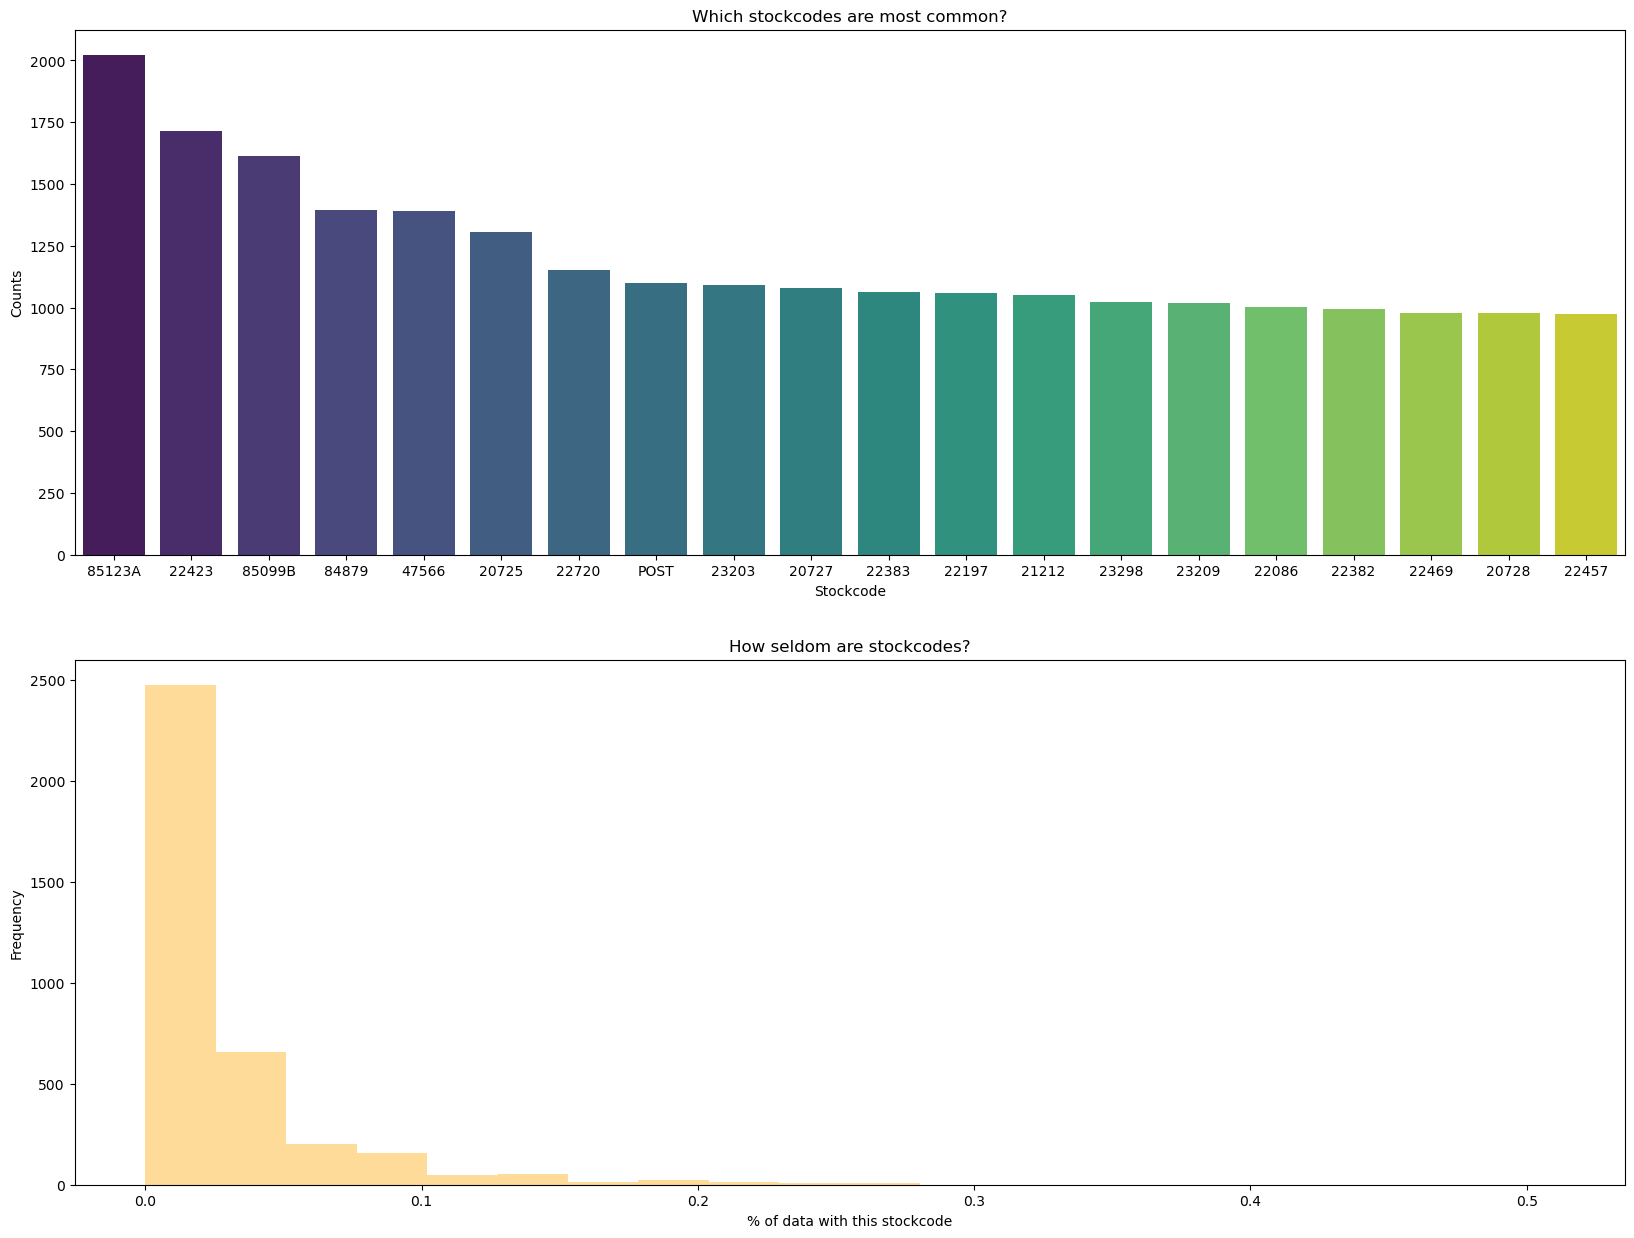

In [25]:
# Count occurrences of each StockCode
stockcode_counts = df_processed.StockCode.value_counts().sort_values(ascending=False)

# Create a 2x1 subplot figure
fig, ax = plt.subplots(2, 1, figsize=(20, 15))

# Plot the top 20 most common stockcodes as a bar plot
sns.barplot(x=stockcode_counts.iloc[0:20].index,
            y=stockcode_counts.iloc[0:20].values,
            ax=ax[0], palette="viridis")

# Set labels and title for the first subplot
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Stockcode")
ax[0].set_title("Which stockcodes are most common?")

# Plot the distribution of stockcodes as a histogram in the second subplot
sns.distplot(np.round(stockcode_counts / df_processed.shape[0] * 100, 2),
             kde=False,
             bins=20,
             ax=ax[1], color="Orange")

# Set labels and title for the second subplot
ax[1].set_title("How seldom are stockcodes?")
ax[1].set_xlabel("% of data with this stockcode")
ax[1].set_ylabel("Frequency")

The occurrence of **POST** as the most common stock code is peculiar. This anomaly suggests the potential for unusual instances not only in descriptions and customer IDs but also in stock codes. Notably, the **POST** code is shorter and non-numeric compared to others. The majority of stock codes appear infrequently, indicating a wide range of products offered by the retailer without strong specialization in specific codes. However, caution is advised, as this observation does not necessarily imply a lack of specialization in specific product types.

### Basket Price

The primary aim of this section is to introduce a new variable within the DataFrame, representing the total price of each purchase. To achieve this, the analysis focuses on aggregating individual product prices associated with specific orders. The objective is to create a comprehensive perspective on the total value of each order. The analysis delves into visualizing the distribution of purchases across various price ranges. The resultant pie chart serves as a graphical representation, highlighting the proportional distribution of purchases within each specified price range.

In [26]:
# Generating a new variable to denote the total price of each purchase
df_processed['TotalPrice'] = df_processed['UnitPrice'] * (df_processed['Quantity'] - df_processed['QuantityCanceled'])
df_processed.sort_values('CustomerID')[:5]

InvoiceNo StockCode                     Description  Quantity  \
61619    541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
72254    542237     22726      ALARM CLOCK BAKELIKE GREEN         4   
14949    537626     22726      ALARM CLOCK BAKELIKE GREEN         4   
14950    537626     22727       ALARM CLOCK BAKELIKE RED          4   
14951    537626     22728       ALARM CLOCK BAKELIKE PINK         4   

            InvoiceDate  UnitPrice  CustomerID         Country  \
61619  18/01/2011 10:01       1.04       12346  United Kingdom   
72254  26/01/2011 14:30       3.75       12347         Iceland   
14949  07/12/2010 14:57       3.75       12347         Iceland   
14950  07/12/2010 14:57       3.75       12347         Iceland   
14951  07/12/2010 14:57       3.75       12347         Iceland   

       QuantityCanceled  TotalPrice  
61619             74215         0.0  
72254                 0        15.0  
14949                 0        15.0  
14950                 0        15.0  
14951                 0        15.0

In [27]:
# sum of purchases / user & order
temp = df_processed.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns={'TotalPrice': 'Basket Price'})

# date of the order
df_processed['InvoiceDate'] = pd.to_datetime(df_processed['InvoiceDate'], format='%d/%m/%Y %H:%M')
temp = df_processed.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].mean()

# selection of significant entries:
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate'])

basket_price.sort_values('CustomerID')[:6]

CustomerID InvoiceNo  Basket Price                   InvoiceDate
1       12347    537626        711.79 2010-12-07 14:57:00.000000000
2       12347    542237        475.39 2011-01-26 14:29:59.999999744
3       12347    549222        636.25 2011-04-07 10:43:00.000000000
4       12347    556201        382.52 2011-06-09 13:01:00.000000000
5       12347    562032        584.91 2011-08-02 08:48:00.000000000
6       12347    573511       1294.32 2011-10-31 12:25:00.000000000

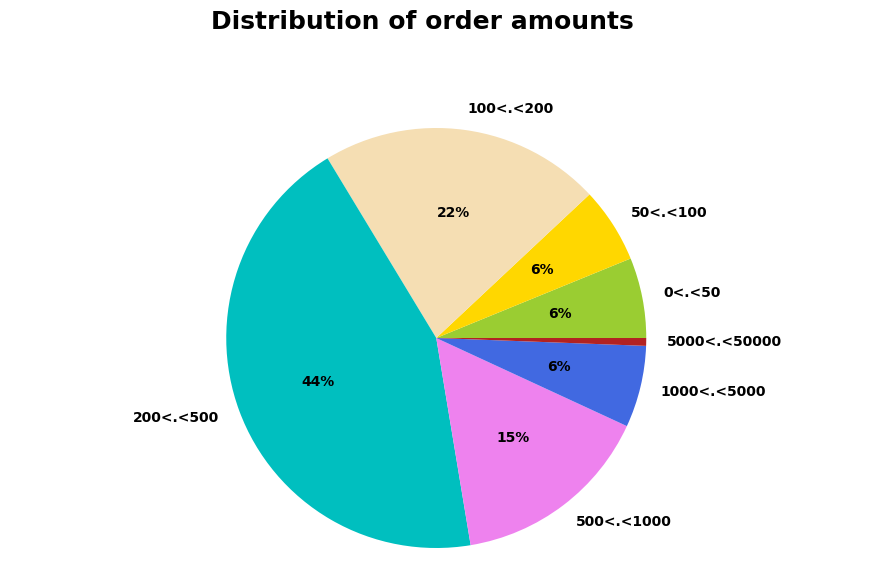

In [28]:
# Purchase countdown
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = basket_price[(basket_price['Basket Price'] < price) &
                       (basket_price['Basket Price'] > price_range[i-1])]['Basket Price'].count()
    count_price.append(val)

# Representation of number of purchases / amount        
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Distribution of order amounts", ha='center', fontsize = 18);

# 3. Insight on Product Category

Within the dataframe, products are uniquely identified by the **StockCode** variable, while a brief description of the products is provided in the **Description** variable. In this section, the latter variable is utilized to arrange and categorize the products into distinct categories.

## Product Description

In this section, the code defines a lambda function to identify nouns based on part-of-speech tagging. Additionally, a function named keywords_inventory is introduced, which processes and extracts keywords from a specified column in a DataFrame. The function employs word stemming and part-of-speech tagging to identify roots of words, aggregating associated sets of names for each root. The resulting roots are then counted for their occurrences. A brief example demonstrates the application of this function on a DataFrame column, showcasing the extracted keywords, their roots, and occurrence counts.

In [29]:
# Define a lambda function to check if a part-of-speech tag represents a noun
is_noun = lambda pos: pos[:2] == 'NN'

# Function to extract and process keywords from a specified column in a DataFrame
def keywords_inventory(dataframe, colonne='Description'):
    # Initialize a stemmer for word stemming
    stemmer = nltk.stem.SnowballStemmer("english")
    
    # Initialize dictionaries and lists to store keyword information
    keywords_roots = dict() 
    keywords_select = dict()
    category_keys = [] 
    count_keywords = dict()
    
    # Iterate through each entry in the specified column of the DataFrame
    for s in dataframe[colonne]:
        # Skip null entries
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        
        # Process each noun
        for t in nouns:
            t = t.lower() 
            racine = stemmer.stem(t)
            
            # Update dictionaries and count for the keyword
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1                
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
    
    # Identify selected keywords for each root based on certain conditions
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:
            # If there are multiple variations, select the one with the shortest length
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k
                    min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            # If there is only one variation, use it as the selected keyword
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("No. of keywords in variable '{}': {}".format(colonne, len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

The above code accepts the dataframe as input and analyzes the content of the Description column through the following operations:

1. Extracts the names (proper, common) present in the product descriptions.
2. For each name, extracts the root of the word and aggregates the set of names associated with this particular root.
3. Counts the occurrences of each root in the dataframe.
4. When multiple words are listed for the same root, the keyword associated with this root is considered to be the shortest name (prioritizing singular when there are singular/plural variants).

In [30]:
df_products = pd.DataFrame(df_copy['Description'].unique()).rename(columns = {0:'Description'})

In [31]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_products)

No. of keywords in variable 'Description': 1483


Upon the execution of this function, three variables are obtained:

1. `keywords`: the list of extracted keywords.
2. `keywords_roots`: a dictionary where the keys represent the roots of the keywords, and the values are lists of words associated with those roots.
3. `count_keywords`: a dictionary listing the frequency of each word's occurrence.

The `count_keywords` dictionary is transformed into a list for the purpose of sorting the keywords based on their occurrences:

In [32]:
products_list = []
for k,v in count_keywords.items():
    products_list.append([keywords_select[k],v])
products_list.sort(key = lambda x:x[1], reverse = True)

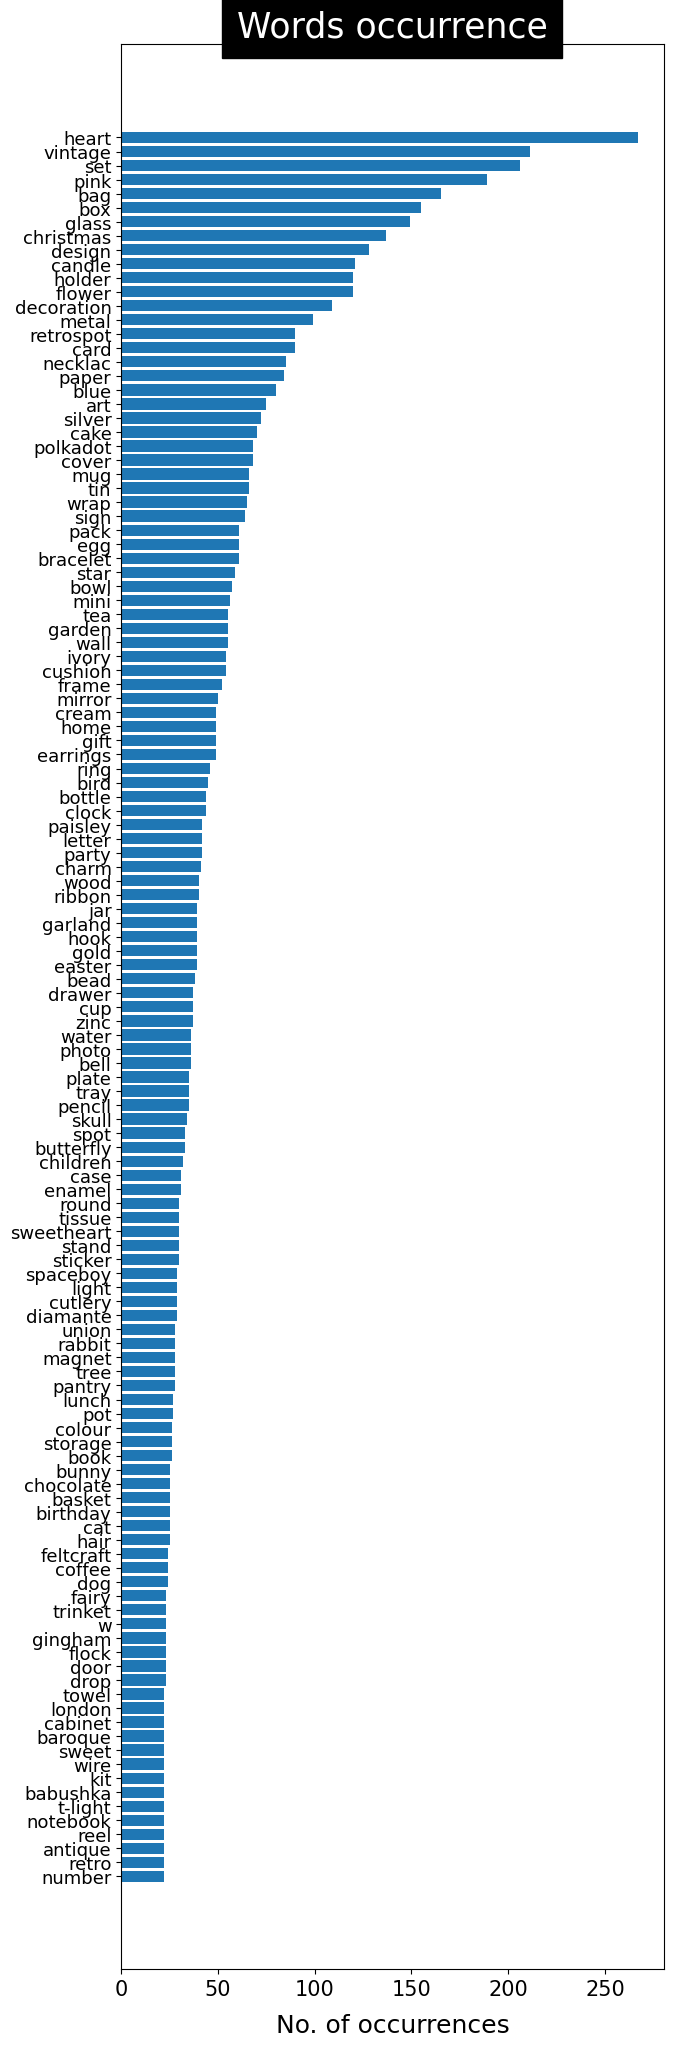

In [33]:
# Using the dictionary, a representation of the most common keywords is created
sorted_list = sorted(products_list, key=lambda x: x[1], reverse=True)

plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 25))

y_axis = [i[1] for i in sorted_list[:125]]
x_axis = [k for k, i in enumerate(sorted_list[:125])]
x_label = [i[0] for i in sorted_list[:125]]

plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.yticks(x_axis, x_label)
plt.xlabel("No. of occurrences", fontsize=18, labelpad=10)

ax.barh(x_axis, y_axis, align='center')
ax = plt.gca()
ax.invert_yaxis()

plt.title("Words occurrence", bbox={'facecolor': 'k', 'pad': 5}, color='w', fontsize=25)
plt.show()

## Product Categories

List of keywords extracted from the dataset further refining it, focusing on meaningful and informative terms. The initial list comprises over 1400 keywords, with the most frequent ones appearing in more than 200 products. In the process of examination, it is observed that certain names, deemed irrelevant or lacking substantial information (such as colors), are considered unnecessary for subsequent analysis. Consequently, the decision is made to discard these words. Additionally, to streamline the analysis, only words that appear more than 13 times are considered for further investigation.

In [34]:
products_list = []
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink', 'blue', 'tag', 'green', 'orange']: continue
    if len(word) < 3 or v < 13: continue
    if ('+' in word) or ('/' in word): continue
    products_list.append([word, v])
#______________________________________________________    
products_list.sort(key = lambda x:x[1], reverse = True)
print('words retained:', len(products_list))

words retained: 193


### Data Encoding

Product groups based on keywords extracted from product descriptions is created. To achieve this, a matrix denoted as `X` is defined, employing the one-hot-encoding principle to represent the presence of keywords in product descriptions. Additionally, to enhance balance in group composition, six extra columns indicating the price range of products are incorporated into the matrix. The subsequent step involves selecting suitable price ranges for the groups, determined by examining the number of products in each category.

In [35]:
products_list = df_processed['Description'].unique()
X = pd.DataFrame()

for product in products_list:
    X.loc[:, product] = list(map(lambda x: int(product.upper() in x), products_list))

In [36]:
# Define threshold values for unit prices and corresponding label columns
threshold = [0, 1, 2, 3, 5, 10]
label_col = []

# Create label columns based on defined thresholds
for i in range(len(threshold)):
    if i == len(threshold) - 1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i], threshold[i + 1])
    label_col.append(col)
    X.loc[:, col] = 0

# Assign labels to products based on their average unit prices and defined thresholds
for i, prod in enumerate(products_list):
    prix = df_processed[df_processed['Description'] == prod]['UnitPrice'].mean()
    j = 0
    while prix > threshold[j]:
        j += 1
        if j == len(threshold):
            break
    X.loc[i, label_col[j - 1]] = 1

In [37]:
print("{:<8} {:<20} \n".format('range', 'no. of products') + 20*'-')
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])    
    print("{:<10}  {:<20}".format(col, X.loc[:, col].sum()))

range    no. of products      
--------------------
0<.<1       964                 
1<.<2       1009                
2<.<3       673                 
3<.<5       606                 
5<.<10      470                 
.>10        156                 


### Creating Clusters for Products

The objective is to categorize products into distinct classes utilizing the k-means clustering method. To determine an optimal number of clusters that best encapsulates the data, the silhouette score is employed in the evaluation process.

In [38]:
%%time
matrix = X.to_numpy()
random_seed = 42
for n_clusters in range(3,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30, random_state=random_seed)
    clusters = kmeans.fit_predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.1898606693276738
For n_clusters = 4 The average silhouette_score is : 0.23552300068988366
For n_clusters = 5 The average silhouette_score is : 0.2729690432305675
For n_clusters = 6 The average silhouette_score is : 0.2892909427660495
For n_clusters = 7 The average silhouette_score is : 0.2704506595454323
For n_clusters = 8 The average silhouette_score is : 0.18366061367393202
For n_clusters = 9 The average silhouette_score is : 0.19756020680999467
CPU times: total: 4min 33s
Wall time: 1min 2s


In [39]:
n_clusters = 5
silhouette_avg = -1
while silhouette_avg < 0.145:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.2729690432305675


### Characterizing the content of clusters

The objective is to assess the quantity of elements within each class, generate a Silhouette intra-cluster score, and create a word cloud for each cluster.

In [40]:
pd.Series(clusters).value_counts()

1    1009
3     964
2     673
0     626
4     606
Name: count, dtype: int64

#### Silhouette intra-cluster score

In [41]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    # Set up the silhouette plot for clusters
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor='dimgray', linewidth=1)

    # Create a subplot for silhouette plot
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)

    # Set x and y axis limits
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])

    # Initialize y_lower for silhouette plots
    y_lower = 10

    for i in range(n_clusters):
        # Plot silhouette values for each cluster
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)

        # Fill the silhouette plot with cluster-specific colors
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.8)

        # Label the silhouette plots with cluster numbers
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color='red', fontweight='bold',
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))

        # Update y_lower for the next plot
        y_lower = y_upper + 10

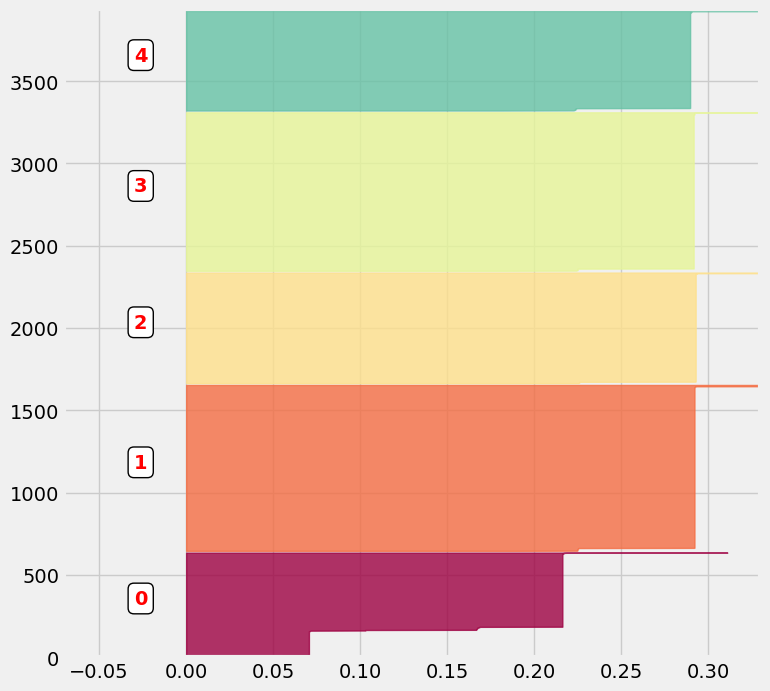

In [42]:
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(matrix, clusters)

graph_component_silhouette(n_clusters, [-0.07, 0.33], len(X), sample_silhouette_values, clusters)

#### Word Cloud

In [43]:
# Create a DataFrame from the list of product names.
keywords = pd.DataFrame(products_list)  

words_list = [word for word in products_list]

occurrence = [dict() for _ in range(n_clusters)]

# Iterate through clusters and count occurrences of each word in the product names.
for i in range(n_clusters):
    keywords_cluster = keywords.loc[clusters == i]
    for word in words_list:
        if word in ['art', 'set', 'heart', 'pink', 'blue', 'tag']:
            continue
        occurrence[i][word] = sum(keywords_cluster.loc[:, 0].str.contains(word.upper()))


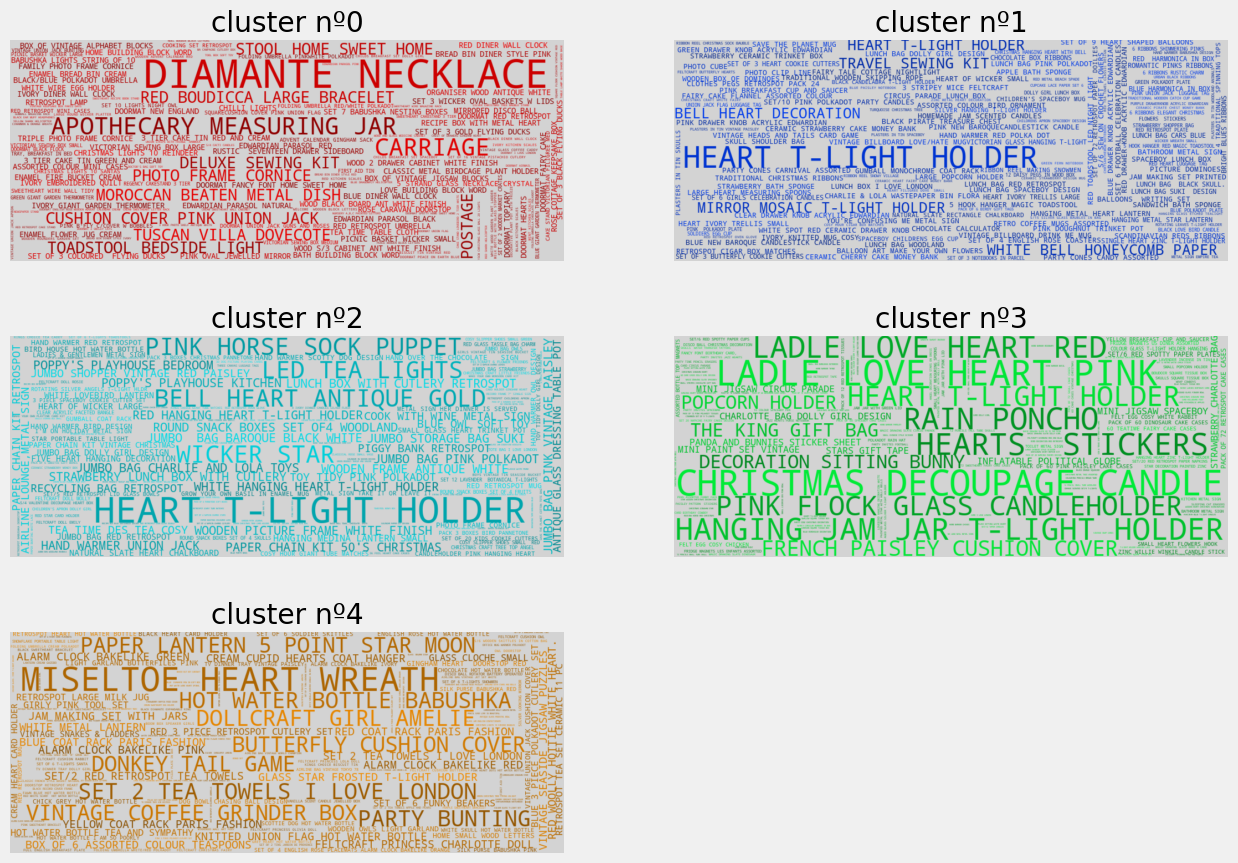

In [44]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

def make_wordcloud(keywords, increment):
    # Create a word cloud and display it for a specific cluster.
    ax1 = fig.add_subplot(4,2,increment)
    words = dict()
    trunc_occurrences = keywords[0:150]
    for s in trunc_occurrences:
        words[s[0]] = s[1]

    wordcloud = WordCloud(width=1000, height=400, background_color='lightgrey', 
                          max_words=1628, relative_scaling=1,
                          color_func=random_color_func,
                          normalize_plurals=False)
    wordcloud.generate_from_frequencies(words)
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster nº{}'.format(increment-1))

fig = plt.figure(1, figsize=(14,14))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for i in range(n_clusters):
    list_cluster_occurrences = occurrence[i]

    # Define the color tone for the words in the word cloud.
    tone = color[i]  
    keywords = []
    for key, value in list_cluster_occurrences.items():
        keywords.append([key, value])
    keywords.sort(key=lambda x: x[1], reverse=True)
    make_wordcloud(keywords, i+1)

# 4. Customer categories

In this section of the project, the primary objective is to format and prepare the data for further analysis. The initial step involves grouping different products into five clusters, introducing this information into the dataframe. The creation of a categorical variable, 'categ_product,' is implemented to signify the cluster of each product. Additionally, variables 'categ_N' are generated to represent the amount spent in each product category.

A subsequent step revolves around the separation of data over time, as the 'basket_price' dataframe is constructed to encompass a 12-month period. This dataset is then split into a training set, comprising the first 10 months, and a test set, including the subsequent two months.

Further refinement focuses on consumer order combinations. Entries related to the same user are grouped, allowing for the determination of essential purchase statistics per user. Additional variables, such as the number of days since the first and last purchase, are introduced, providing temporal insights.

Moving on, the exploration extends to the creation of customer categories. Data encoding in the 'transactions_per_user' dataframe summarizes all commands made by each client. Standardization of data in a matrix follows, and Principal Component Analysis (PCA) is applied for dimensionality reduction and visualization of variance explained.

The pivotal aspect involves the creation of customer clusters utilizing the k-means algorithm, with the selection of the number of clusters based on silhouette scores. Validation of cluster separation is conducted through PCA results and silhouette scores within clusters. The project then delves into understanding customer habits within each cluster, examining average basket prices, visit frequency, and total amounts spent.

## Formating Data

In [45]:
# Create a mapping dictionary to assign clusters to products and apply it to the DataFrame.
corresp = dict()
for key, val in zip (products_list, clusters):
    corresp[key] = val 
df_processed['categ_product'] = df_processed.loc[:, 'Description'].map(corresp)

### Grouping products

In [46]:
# Calculate and assign category-specific prices based on quantity and unit price for each category.
for i in range(5):
    col = 'categ_{}'.format(i)        
    df_temp = df_processed[df_processed['categ_product'] == i]
    price_temp = df_temp['UnitPrice'] * (df_temp['Quantity'] - df_temp['QuantityCanceled'])
    price_temp = price_temp.apply(lambda x:x if x > 0 else 0)
    df_processed.loc[:, col] = price_temp
    df_processed[col].fillna(0, inplace = True)
#__________________________________________________________________________________________________
df_processed[['InvoiceNo', 'Description', 'categ_product', 'categ_0', 'categ_1', 'categ_2', 'categ_3','categ_4']][:5]

InvoiceNo                          Description  categ_product  categ_0  \
0    536365   WHITE HANGING HEART T-LIGHT HOLDER              2      0.0   
1    536365                  WHITE METAL LANTERN              4      0.0   
2    536365       CREAM CUPID HEARTS COAT HANGER              4      0.0   
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE              4      0.0   
4    536365       RED WOOLLY HOTTIE WHITE HEART.              4      0.0   

   categ_1  categ_2  categ_3  categ_4  
0      0.0     15.3      0.0     0.00  
1      0.0      0.0      0.0    20.34  
2      0.0      0.0      0.0    22.00  
3      0.0      0.0      0.0    20.34  
4      0.0      0.0      0.0    20.34

In [47]:
# Sum of purchases / user & order
temp = df_processed.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns = {'TotalPrice':'Basket Price'})

# Percentage of order price / product category
for i in range(5):
    col = 'categ_{}'.format(i) 
    temp = df_processed.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)[col].sum()
    basket_price.loc[:, col] = temp[col]


# Date of the order
df_processed['InvoiceDate_int'] = df_processed['InvoiceDate'].astype('int64')
temp = df_processed.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
df_processed.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])

# Selection of significant entries:
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID', ascending = True)[:5]

CustomerID InvoiceNo  Basket Price  categ_0  categ_1  categ_2  categ_3  \
1       12347    537626        711.79   124.44    187.2    83.40    23.40   
2       12347    542237        475.39    38.25    130.5    53.10    84.34   
3       12347    549222        636.25    38.25    330.9    71.10    81.00   
4       12347    556201        382.52    19.90     74.4    78.06    41.40   
5       12347    562032        584.91   136.05    109.7   119.70    61.30   

   categ_4                   InvoiceDate  
1   293.35 2010-12-07 14:57:00.000000000  
2   169.20 2011-01-26 14:29:59.999999744  
3   115.00 2011-04-07 10:43:00.000000000  
4   168.76 2011-06-09 13:01:00.000000000  
5   158.16 2011-08-02 08:48:00.000000000

### Separation of data over time

In [48]:
# Print the minimum and maximum invoice dates
print(basket_price['InvoiceDate'].min(), '->',  basket_price['InvoiceDate'].max())

2010-12-01 08:26:00 -> 2011-12-09 12:50:00


In [49]:
# Create training and test sets based on the InvoiceDate
set_train        = basket_price[basket_price['InvoiceDate'] < pd.Timestamp(2011,10,1)]
set_test         = basket_price[basket_price['InvoiceDate'] >= pd.Timestamp(2011,10,1)]
basket_price = set_train.copy(deep = True)

### Consumer Order Combinations

In [50]:
# Calculate statistics on basket amount and number of visits per user
transactions_per_user = basket_price.groupby(by=['CustomerID'])['Basket Price'].agg(['count', 'min', 'max', 'mean', 'sum'])

# Calculate the percentage contribution of each product category to the total basket amount for each user
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:, col] = basket_price.groupby(by=['CustomerID'])[col].sum() / transactions_per_user['sum'] * 100

# Reset the index of transactions_per_user DataFrame
transactions_per_user.reset_index(drop=False, inplace=True)

# Display the sum of basket amounts for 'categ_0' for each customer
basket_price.groupby(by=['CustomerID'])['categ_0'].sum()
transactions_per_user.sort_values('CustomerID', ascending=True)[:5]

CustomerID  count     min     max        mean      sum    categ_0  \
0       12347      5  382.52  711.79  558.172000  2790.86  12.787815   
1       12348      4  227.44  892.80  449.310000  1797.24  20.030714   
2       12350      1  334.40  334.40  334.400000   334.40  11.961722   
3       12352      6  144.35  840.30  345.663333  2073.98  67.534402   
4       12353      1   89.00   89.00   89.000000    89.00  67.078652   

     categ_1    categ_2    categ_3    categ_4  
0  29.836681  14.524555  10.442659  32.408290  
1  41.953217   0.000000  38.016069   0.000000  
2  48.444976  27.900718  11.692584   0.000000  
3  12.892120   3.370331   0.491808  15.711338  
4  13.033708  19.887640   0.000000   0.000000

In [51]:
# Find the last date in the dataset
last_date = basket_price['InvoiceDate'].max().date()

# Create DataFrames for the first registration date and last purchase date for each customer
first_registration = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].min())
last_purchase = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].max())

# Calculate the days since last purchase and days since first registration for each customer
test = first_registration.applymap(lambda x: (last_date - x.date()).days)
test2 = last_purchase.applymap(lambda x: (last_date - x.date()).days)

# Update the transactions_per_user DataFrame with the calculated values
transactions_per_user.loc[:, 'LastPurchase'] = test2.reset_index(drop=False)['InvoiceDate']
transactions_per_user.loc[:, 'FirstPurchase'] = test.reset_index(drop=False)['InvoiceDate']

transactions_per_user[:5]

CustomerID  count     min     max        mean      sum    categ_0  \
0       12347      5  382.52  711.79  558.172000  2790.86  12.787815   
1       12348      4  227.44  892.80  449.310000  1797.24  20.030714   
2       12350      1  334.40  334.40  334.400000   334.40  11.961722   
3       12352      6  144.35  840.30  345.663333  2073.98  67.534402   
4       12353      1   89.00   89.00   89.000000    89.00  67.078652   

     categ_1    categ_2    categ_3    categ_4  LastPurchase  FirstPurchase  
0  29.836681  14.524555  10.442659  32.408290            59            297  
1  41.953217   0.000000  38.016069   0.000000             5            288  
2  48.444976  27.900718  11.692584   0.000000           240            240  
3  12.892120   3.370331   0.491808  15.711338             2            226  
4  13.033708  19.887640   0.000000   0.000000           134            134

In [52]:
# Calculate and print the percentage of customers with a single purchase
n1 = transactions_per_user[transactions_per_user['count'] == 1].shape[0]
n2 = transactions_per_user.shape[0]
print("no. of customers with a single purchase: {:<2}/{:<5} ({:<2.2f}%)".format(n1,n2,n1/n2*100))

no. of customers with a single purchase: 1450/3613  (40.13%)


## Creation of customers categories

### Data encoding

In [53]:
# Select specific columns for analysis and create a matrix
list_cols = ['count','min','max','mean','categ_0','categ_1','categ_2','categ_3','categ_4']

selected_customers = transactions_per_user.copy(deep = True)
matrix = selected_customers[list_cols].to_numpy()

In [54]:
# Standardize the matrix using StandardScaler
scaler = StandardScaler()
scaler.fit(matrix)
print('variables mean values: \n' + 90*'-' + '\n' , scaler.mean_)
scaled_matrix = scaler.transform(matrix)

variables mean values: 
------------------------------------------------------------------------------------------
 [  3.62468862 260.77072571 559.12550595 378.33202642  23.31641277
  25.17823303  21.16391799  13.96981184  16.38107082]


In [55]:
# Perform Principal Component Analysis (PCA) on the standardized matrix
pca = PCA()
pca.fit(scaled_matrix)
pca_samples = pca.transform(scaled_matrix)

Text(0.5, 0, 'Principal components')

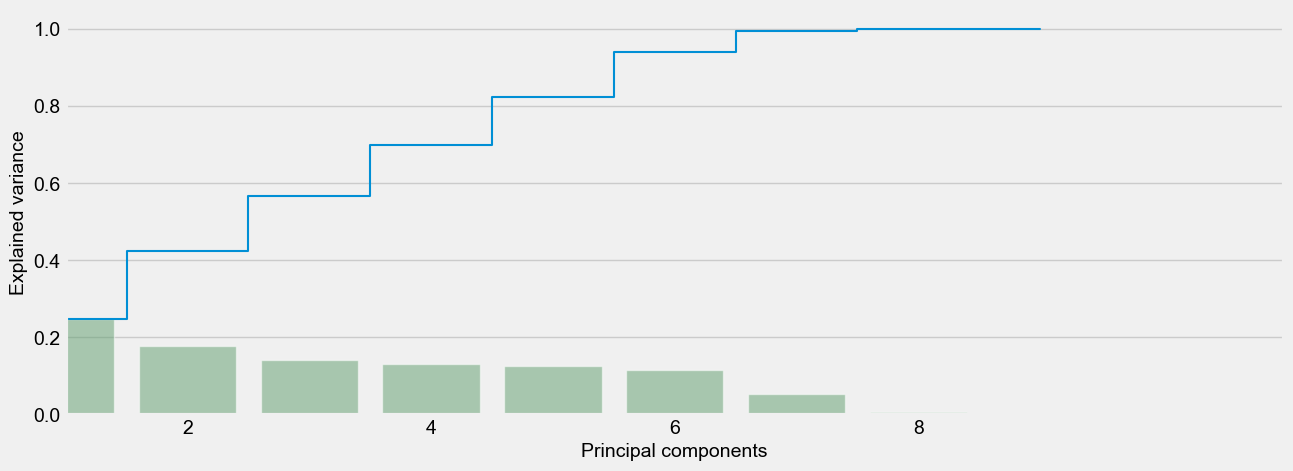

In [56]:
# Create a plot for explaining PCA results
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)

# Plot cumulative explained variance and individual explained variance
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(x=np.arange(1, matrix.shape[1] + 1), y=pca.explained_variance_ratio_, alpha=0.5, color='g',
            label='individual explained variance')

plt.xlim(0, 10)

ax.set_xticklabels([s if int(s.get_text()) % 2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize=14)
plt.xlabel('Principal components', fontsize=14)

### Creation of customer categories

In [57]:
# Set the number of clusters for KMeans
n_clusters = 11

# Initialize and fit KMeans model
kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=100)
kmeans.fit(scaled_matrix)

# Predict clusters for each data point
clusters_clients = kmeans.predict(scaled_matrix)

silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
print('Silhouette score: {:<.3f}'.format(silhouette_avg))

Silhouette score: 0.217


### Report via the PCA

In [58]:
# Apply PCA to reduce dimensionality to 6 components and add cluster labels to the transformed data
pca = PCA(n_components=6)
matrix_3D = pca.fit_transform(scaled_matrix)
mat = pd.DataFrame(matrix_3D)
mat['cluster'] = pd.Series(clusters_clients)

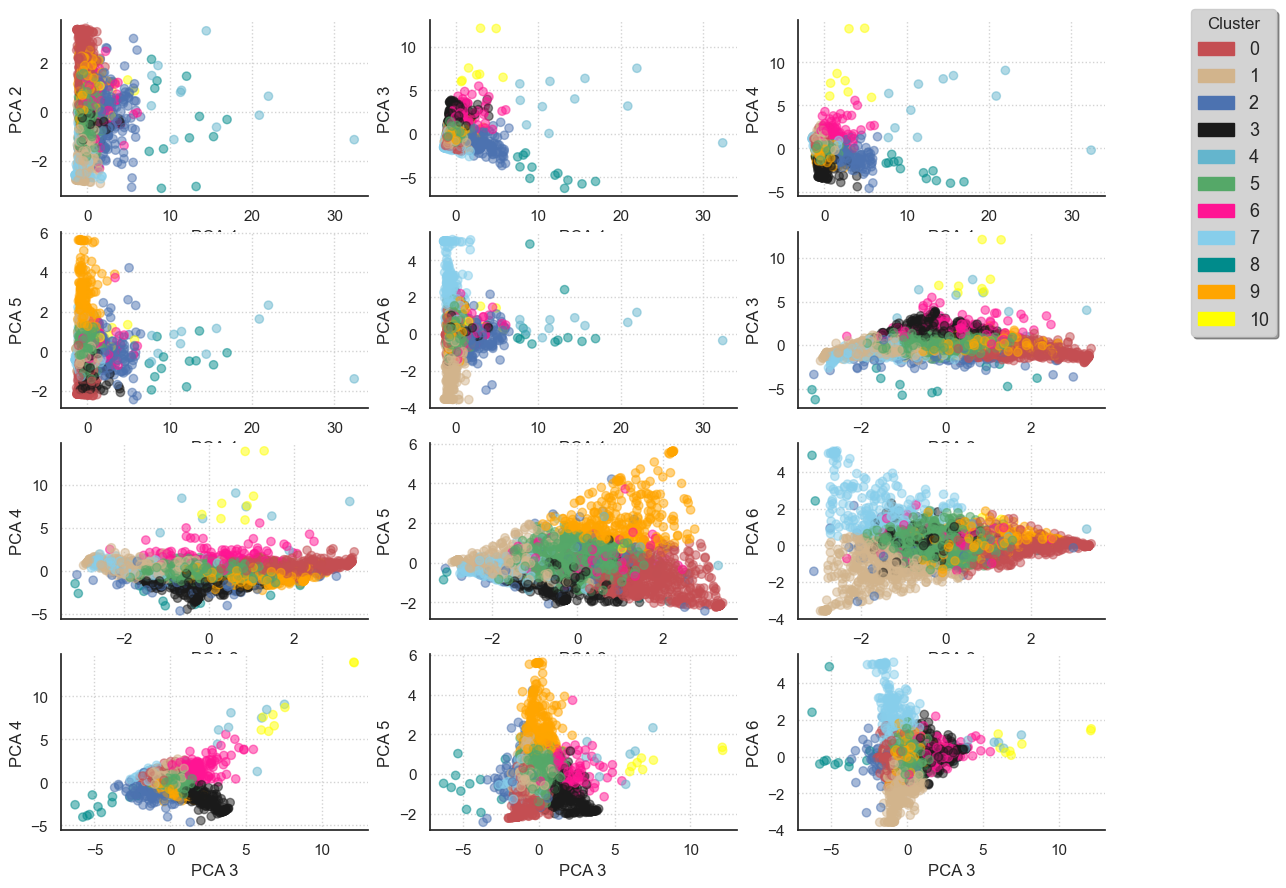

In [59]:
# Scatter plot of PCA components with cluster labels
# Each subplot shows the relationship between two PCA components
sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

# Define a color map for cluster labels
LABEL_COLOR_MAP = {0:'r', 1:'tan', 2:'b', 3:'k', 4:'c', 5:'g', 6:'deeppink', 7:'skyblue', 8:'darkcyan', 9:'orange',
                   10:'yellow', 11:'tomato', 12:'seagreen'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

# Create a 4x3 grid of scatter plots for pairs of PCA components
fig = plt.figure(figsize=(12, 10))
increment = 0
for ix in range(6):
    for iy in range(ix + 1, 6):   
        increment += 1
        ax = fig.add_subplot(4, 3, increment)
        ax.scatter(mat[ix], mat[iy], c=label_color, alpha=0.5) 
        plt.ylabel('PCA {}'.format(iy + 1), fontsize=12)
        plt.xlabel('PCA {}'.format(ix + 1), fontsize=12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 12:
            break
    if increment == 12:
        break

# Set legend for cluster labels
comp_handler = [mpatches.Patch(color=LABEL_COLOR_MAP[i], label=i) for i in range(n_clusters)]
plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9), 
           title='Cluster', facecolor='lightgrey',
           shadow=True, frameon=True, framealpha=1,
           fontsize=13, bbox_transform=plt.gcf().transFigure)

plt.tight_layout()

### Intra-cluster silhouette score

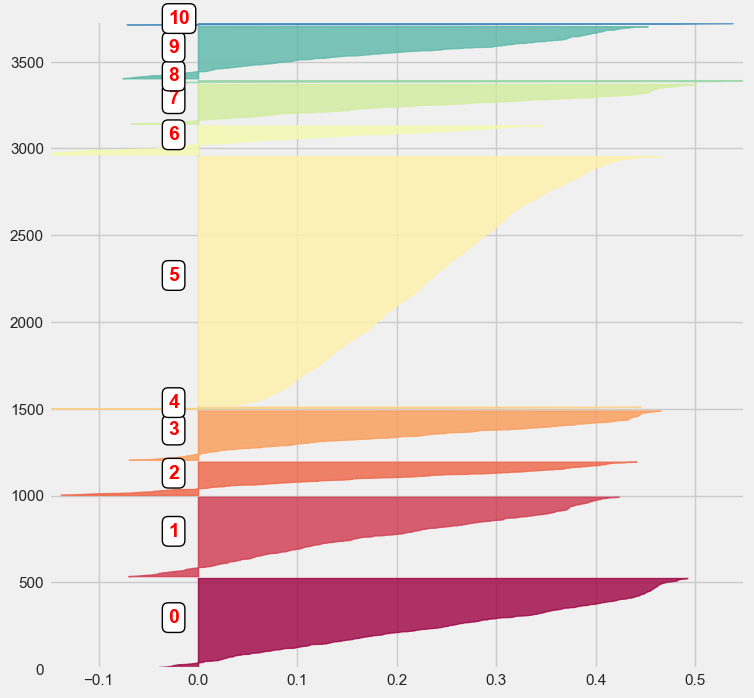

In [60]:
# Calculate individual silhouette scores for each data point
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)

graph_component_silhouette(n_clusters, [-0.15, 0.55], len(scaled_matrix), sample_silhouette_values, clusters_clients)

### Customers morphotype

In [61]:
selected_customers.loc[:, 'cluster'] = clusters_clients

In [62]:
# Create an empty DataFrame to store cluster-wise mean values and size
merged_df = pd.DataFrame()

# Iterate through clusters and calculate mean values and size
for i in range(n_clusters):
    # Calculate mean values for each column in the cluster
    test = pd.DataFrame(selected_customers[selected_customers['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop=True)
    test['size'] = selected_customers[selected_customers['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])

# Drop 'CustomerID' column and print the total number of customers
merged_df.drop('CustomerID', axis=1, inplace=True)
print('Number of customers:', merged_df['size'].sum())

# Sort the DataFrame based on the 'sum' column
merged_df = merged_df.sort_values('sum')

Number of customers: 3613


# 5. Classification of customers

In this section, the primary aim is to develop a classifier capable of accurately categorizing consumers into the distinct client categories established in the preceding section. The overarching goal is to enable this classification at the initial visit. To achieve this objective, a systematic evaluation of various classifiers implemented in scikit-learn will be conducted. The intention is to identify and deploy a classifier that demonstrates optimal performance in accurately assigning clients to their respective categories from their first interaction.

Initially, a class is introduced to streamline the utilization of multiple classifiers by consolidating common functionalities. This simplification is designed to enhance the ease of interfacing with various classifiers and facilitate a more straightforward implementation of shared features.

In [63]:
# A class for facilitating machine learning model training, prediction, and grid search

class Class_Fit(object):
    def __init__(self, clf, params=None):
        # Constructor initializing the classifier with optional parameters
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        # Method for training the classifier on input features (x_train) and target labels (y_train)
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        # Method for making predictions using the trained classifier on input features (x)
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        # Method for setting up a grid search with cross-validation
        self.grid = GridSearchCV(estimator=self.clf, param_grid=parameters, cv=Kfold)
        
    def grid_fit(self, X, Y):
        # Method for fitting the grid search to the input features (X) and target labels (Y)
        self.grid.fit(X, Y)
        
    def grid_predict(self, X, Y):
        # Method for making predictions using the best parameters found by grid search and printing accuracy
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100 * metrics.accuracy_score(Y, self.predictions)))

In [64]:
# Extracting selected features (columns) and target labels for machine learning model training
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4' ]
X = selected_customers[columns]
Y = selected_customers['cluster']

In [65]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, train_size = 0.8)

## Support Vector Machine Classifier (SVC)

The initial classifier employed is the Support Vector Classifier (SVC). To utilize it effectively, an instance of the Class_Fit class is instantiated, followed by the invocation of the grid_search() method. During this process, the hyperparameters are specified for optimal value exploration, and the desired number of folds for cross-validation is provided as parameters. This systematic approach enables efficient tuning of the SVC classifier for enhanced performance.

In [66]:
svc = Class_Fit(clf = svm.LinearSVC)
svc.grid_search(parameters = [{'C':np.logspace(-2,2,10)}], Kfold = 5)

In [67]:
%%time
svc.grid_fit(X = X_train, Y = Y_train)

CPU times: total: 39.6 s
Wall time: 24.1 s


In [68]:
svc.grid_predict(X_test, Y_test)

Precision: 83.40 % 


### Confusion Matrix

In the analysis, a confusion matrix was employed to assess the performance of the clustering model. The rationale behind using a confusion matrix lies in evaluating the accuracy of predictions, particularly considering the potential class imbalance observed during the definition of different customer clusters. This approach allows a comprehensive examination of how the predicted and actual values align with the distribution of instances across various classes

In [69]:
# Function to plot confusion matrix with optional normalization
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    # Plotting the confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    # Adding annotations to each cell in the matrix
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    # Formatting and labeling
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


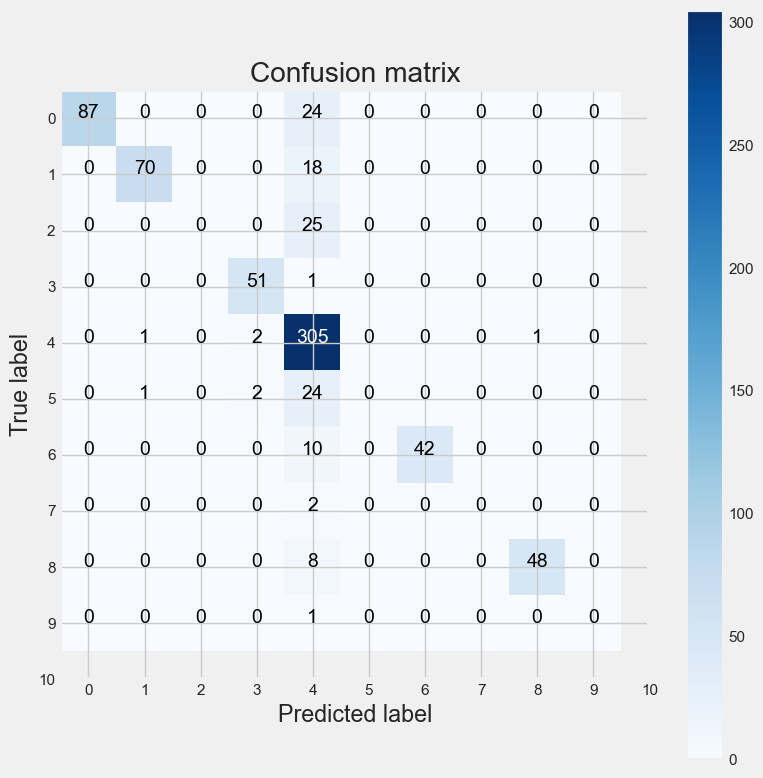

In [70]:
# Plotting a confusion matrix for the predictions made by a Support Vector Classifier (SVC)
class_names = [i for i in range(11)]
cnf_matrix = confusion_matrix(Y_test, svc.predictions) 
np.set_printoptions(precision=2)
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Confusion matrix')

### Learning curve

An effective method for evaluating the performance of a model is by plotting a learning curve. This visual representation aids in identifying issues such as overfitting or underfitting. Additionally, it provides insights into the potential benefits of utilizing a larger dataset for improved model performance.

In [71]:
# Generate a simple plot of the test and training learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    # Calculating the learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Calculating mean and standard deviation of training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    # Filling the area around the training score curve with color representing standard deviation
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    # Filling the area around the test score curve with color representing standard deviation
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # Plotting the mean training score curve
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

CPU times: total: 172 ms
Wall time: 7.69 s


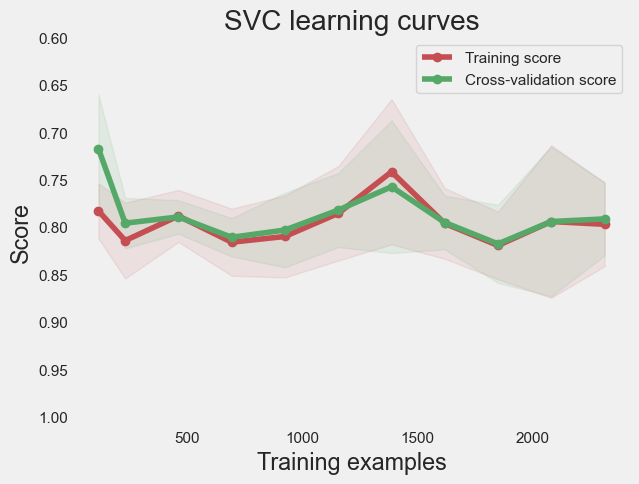

In [72]:
%%time
g = plot_learning_curve(svc.grid.best_estimator_,
                        "SVC learning curves", X_train, Y_train, ylim = [1.01, 0.6],
                        cv = 5,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])

## Logistic Regression

In [73]:
%%time
lr = Class_Fit(clf = linear_model.LogisticRegression)
lr.grid_search(parameters = [{'C':np.logspace(-2,2,20)}], Kfold = 5)
lr.grid_fit(X = X_train, Y = Y_train)
lr.grid_predict(X_test, Y_test)

Precision: 89.76 % 
CPU times: total: 42 s
Wall time: 14.9 s


CPU times: total: 500 ms
Wall time: 1.39 s


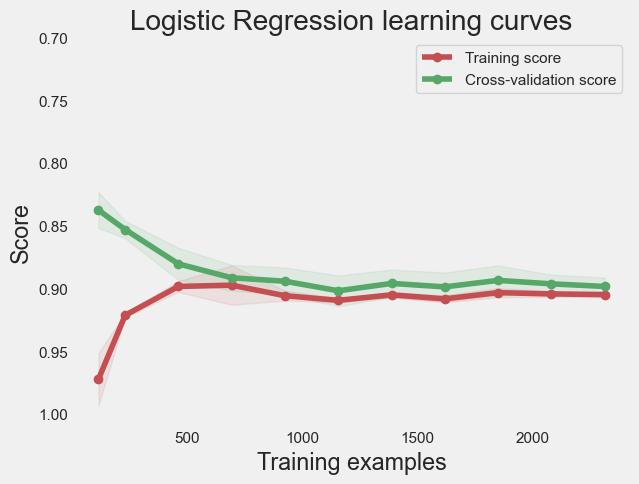

In [74]:
%%time
g = plot_learning_curve(lr.grid.best_estimator_, "Logistic Regression learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### k-Nearest Neighbors

In [75]:
%%time
knn = Class_Fit(clf = neighbors.KNeighborsClassifier)
knn.grid_search(parameters = [{'n_neighbors': np.arange(1,50,1)}], Kfold = 5)
knn.grid_fit(X = X_train, Y = Y_train)
knn.grid_predict(X_test, Y_test)

Precision: 79.53 % 
CPU times: total: 6.69 s
Wall time: 7.42 s


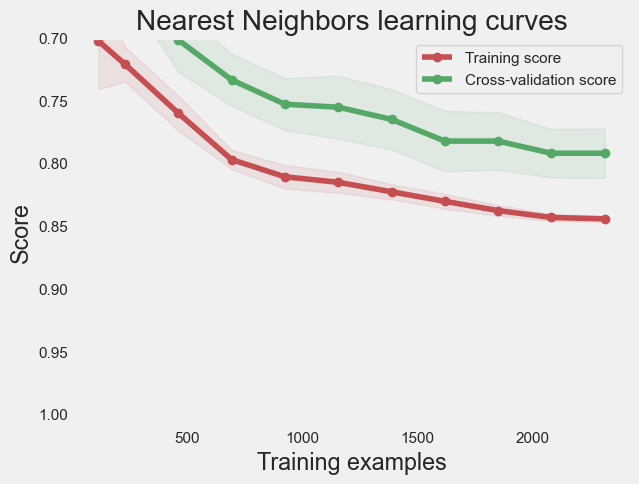

In [76]:
g = plot_learning_curve(knn.grid.best_estimator_, "Nearest Neighbors learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### Decision Tree

In [77]:
%%time
tr = Class_Fit(clf = tree.DecisionTreeClassifier)
tr.grid_search(parameters = [{'criterion' : ['entropy', 'gini'], 'max_features' :['sqrt', 'log2']}], Kfold = 5)
tr.grid_fit(X = X_train, Y = Y_train)
tr.grid_predict(X_test, Y_test)

Precision: 84.79 % 
CPU times: total: 500 ms
Wall time: 617 ms


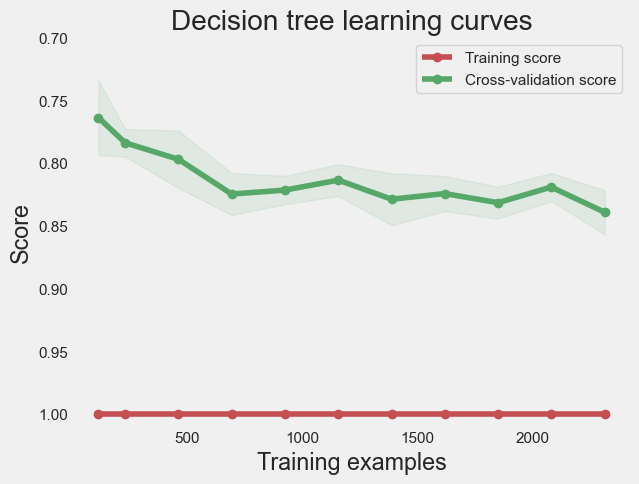

In [78]:
g = plot_learning_curve(tr.grid.best_estimator_, "Decision tree learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### Random Forest

In [79]:
%%time
rf = Class_Fit(clf = ensemble.RandomForestClassifier)
param_grid = {'criterion' : ['entropy', 'gini'], 'n_estimators' : [20, 40, 60, 80, 100],
               'max_features' :['sqrt', 'log2']}
rf.grid_search(parameters = param_grid, Kfold = 5)
rf.grid_fit(X = X_train, Y = Y_train)
rf.grid_predict(X_test, Y_test)

Precision: 91.42 % 
CPU times: total: 1min 24s
Wall time: 1min 33s


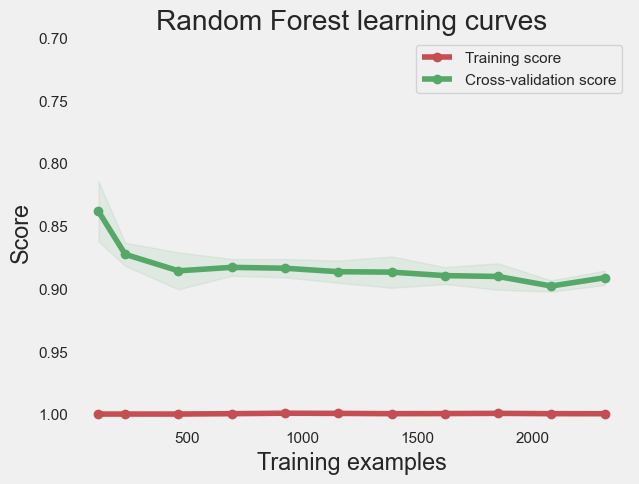

In [80]:
g = plot_learning_curve(rf.grid.best_estimator_, "Random Forest learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### AdaBoost Classifier

In [81]:
%%time
ada = Class_Fit(clf = AdaBoostClassifier)
param_grid = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
ada.grid_search(parameters = param_grid, Kfold = 5)
ada.grid_fit(X = X_train, Y = Y_train)
ada.grid_predict(X_test, Y_test)

Precision: 57.68 % 
CPU times: total: 17.9 s
Wall time: 20.2 s


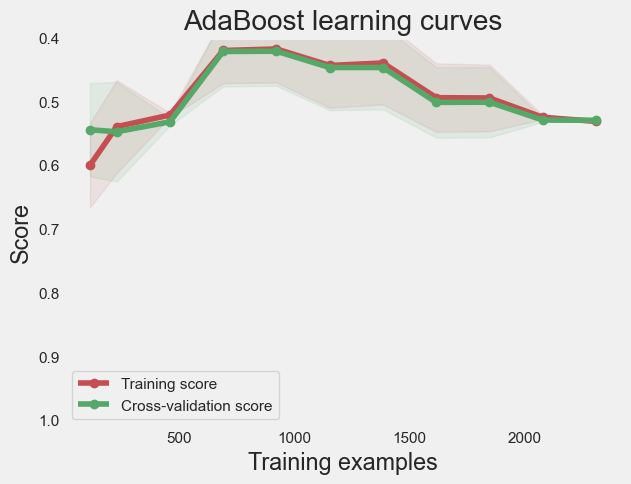

In [82]:
g = plot_learning_curve(ada.grid.best_estimator_, "AdaBoost learning curves", X_train, Y_train,
                        ylim = [1.01, 0.4], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### Gradient Boosting Classifier

In [83]:
%%time
gb = Class_Fit(clf = ensemble.GradientBoostingClassifier)
param_grid = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
gb.grid_search(parameters = param_grid, Kfold = 5)
gb.grid_fit(X = X_train, Y = Y_train)
gb.grid_predict(X_test, Y_test)

Precision: 90.87 % 
CPU times: total: 5min 54s
Wall time: 6min 33s


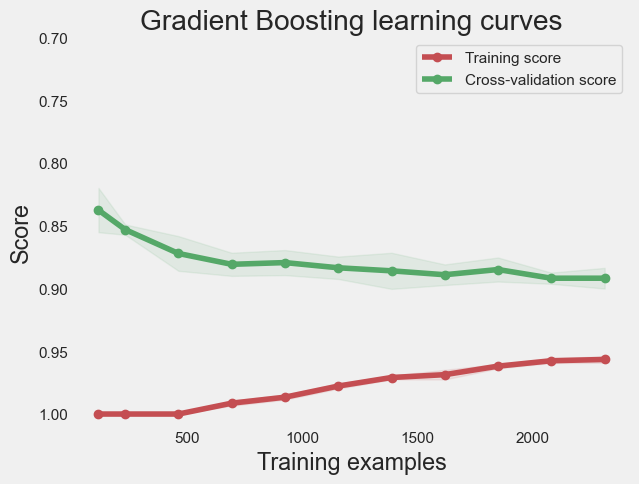

In [84]:
g = plot_learning_curve(gb.grid.best_estimator_, "Gradient Boosting learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

## Voting

Now we can enhance the classification model by combining the outcomes of various classifiers. This involves selecting the customer category based on the majority prediction from multiple classifiers. The implementation of this process is facilitated through the use of the VotingClassifier method.

Initially, the parameters of the different classifiers are adjusted using the optimal values obtained earlier.

In [85]:
rf_best  = ensemble.RandomForestClassifier(**rf.grid.best_params_)
gb_best  = ensemble.GradientBoostingClassifier(**gb.grid.best_params_)
svc_best = svm.SVC(kernel='linear', probability=True, **svc.grid.best_params_)
tr_best  = tree.DecisionTreeClassifier(**tr.grid.best_params_)
knn_best = neighbors.KNeighborsClassifier(**knn.grid.best_params_)
lr_best  = linear_model.LogisticRegression(**lr.grid.best_params_)

In [86]:
votingC = ensemble.VotingClassifier(estimators=[('rf', rf_best), ('gb', gb_best),
                                                ('knn', knn_best), ('lr', lr_best)],
                                    voting='soft')

In [87]:
%%time
votingC = votingC.fit(X_train, Y_train)

CPU times: total: 4.12 s
Wall time: 11.8 s


In [88]:
predictions = votingC.predict(X_test)
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y_test, predictions)))

Precision: 91.29 % 


It's important to note that when constructing the voting classifier (votingC), a subset of the entire set of classifiers was utilized. Specifically, the Random Forest, k-Nearest Neighbors, Logistic Regression, and Gradient Boosting classifiers were selected. This decision was made based on their performance in the subsequent classification process.

# 6. Testing Predictions

In the preceding section, classifiers were trained for customer categorization using data from the initial 10 months. The analysis is now extended to assess the model's performance on the last two months of the dataset stored in the set_test dataframe.

The initial step involved reformatting and adjusting the set_test data to align with the training set. This process included correcting for the time difference between the two datasets and applying appropriate weights to variables like count and sum to ensure equivalence with the training set.

Moving on, the dataframe was transformed into a matrix, retaining only the variables defining customer categories. The normalization method employed on the training set was then applied to this dataset.

In [89]:
basket_price = set_test.copy(deep = True)

In [90]:
# Aggregate transaction data for each customer
transactions_per_user = basket_price.groupby(by=['CustomerID'])['Basket Price'].agg(['count', 'min', 'max', 'mean', 'sum'])

# Calculate category percentages for each customer
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:, col] = basket_price.groupby(by=['CustomerID'])[col].sum() / transactions_per_user['sum'] * 100

transactions_per_user.reset_index(drop=False, inplace=True)

basket_price.groupby(by=['CustomerID'])['categ_0'].sum()

# Correcting time range by multiplying count and sum by 5
transactions_per_user['count'] = 5 * transactions_per_user['count']
transactions_per_user['sum'] = transactions_per_user['count'] * transactions_per_user['mean']

transactions_per_user.sort_values('CustomerID', ascending=True)[:5]

CustomerID  count      min      max     mean       sum     categ_0  \
0       12347     10   224.82  1294.32   759.57   7595.70   10.670511   
1       12349      5  1757.55  1757.55  1757.55   8787.75   46.021450   
2       12352      5   311.73   311.73   311.73   1558.65   42.953838   
3       12356      5    58.35    58.35    58.35    291.75  100.000000   
4       12357      5  6207.67  6207.67  6207.67  31038.35   33.399810   

     categ_1    categ_2    categ_3    categ_4  
0  20.017905  32.343299  12.696657  24.271627  
1  26.506216  12.245455   4.513101  10.713778  
2  34.420813   8.735123   6.672441   7.217785  
3   0.000000   0.000000   0.000000   0.000000  
4  18.475531  14.684737   5.089832  28.350089

In [91]:
# Define a list of columns to be used in the matrix
cols_list = ['count', 'min', 'max', 'mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']

# Create a matrix using selected columns
matrix_test = transactions_per_user[cols_list].to_numpy()

# Scale the test matrix using the previously fitted scaler
scaled_test_matrix = scaler.transform(matrix_test)

The matrix generated at this stage encapsulates the buying habits of individual consumers. It's crucial to clarify that this step isn't the classification phase but rather a preparation for testing. During this preparation, we assign categories to customers based on data collected over a two-month period, utilizing variables like **count, min, max, and sum**. It's important to note that the classifier defined in Section 5 relies on a more refined set of variables derived from a customer's initial purchase.

In this stage, the objective is to utilize the two-month dataset to categorize customers into specific groups. The classifier's performance is then assessed by comparing its predictions with the predefined customer categories. To designate customer categories, the kmeans method instance introduced earlier in Section 4 is employed. The predict method of this instance calculates the distance of customers from the centroids of the 11 client classes and assigns them to the category with the smallest distance.

In [92]:
Y = kmeans.predict(scaled_test_matrix)

In [93]:
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4' ]
X = transactions_per_user[columns]

In [94]:
# List of classifiers
classifiers = [(svc, 'Support Vector Machine'),
                (lr, 'Logistic Regression'),
                (knn, 'k-Nearest Neighbors'),
                (tr, 'Decision Tree'),
                (rf, 'Random Forest'),
                (gb, 'Gradient Boosting')]

# Iterate through classifiers and print predictions based on grid search results
for clf, label in classifiers:
    print(30*'_', '\n{}'.format(label))
    
    # Utilize the grid_predict method to make predictions
    clf.grid_predict(X, Y)

______________________________ 
Support Vector Machine
Precision: 67.54 % 
______________________________ 
Logistic Regression
Precision: 74.83 % 
______________________________ 
k-Nearest Neighbors
Precision: 67.39 % 
______________________________ 
Decision Tree
Precision: 70.13 % 
______________________________ 
Random Forest
Precision: 74.72 % 
______________________________ 
Gradient Boosting
Precision: 74.72 % 


As discussed earlier, there is an opportunity to enhance the classifier's performance by aggregating their predictions. In this context, I opted to blend predictions from Random Forest, Gradient Boosting, Logistic Regression, and k-Nearest Neighbors. This strategic combination yields a modest improvement in prediction accuracy.

In [95]:
predictions = votingC.predict(X)
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, predictions)))

Precision: 75.85 % 
